Instructions
Project proposal to predict credit card approval
Questions,
Hypothesis,
Approach.


You will prepare a project proposal detailing the questions we are wanting to answer. The initial hypotheses about the data relationships and the approach you will take to get your answers.


Proposal is just a plan.
End goal is important





**Section 1:** Questions to Answer

What questions do you want to answer? 2-5


Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

How is it going to impact the banking sector?

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.


**Section 2:** Initial Hypothesis (or hypotheses)

Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track.

If DA track please aim to identify patterns in the data and important features that may impact a ML model.

If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

From step 1, you may see some relationship that you want to explore and will develop a belief about data


**Section 3:** Data analysis approach

What approach are you going to take in order to prove or disprove your hypothesis?

What feature engineering techniques will be relevant to your project?

Please justify your data analysis approach.

Identify important patterns in your data using the EDA approach to justify your findings.


**Section 4:** Machine learning approach

What method will you use for machine learning based predictions for credit card approval?

Please justify the most appropriate model.

Please perform necessary steps required to improve the accuracy of your model.

Please compare all models (at least 4  models).


Utilize machine learning approaches to predict credit card approval based on customer information.


A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.


Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.



**SQL**

Use MySQL or PyMySQL to perform the below queries.

Note: Use only the cleaned data for SQL part of the project


Group the customers based on their income type and find the average of their annual income.

Find the female owners of cars and property.

Find the male customers who are staying with their families.

Please list the top five people having the highest income.

How many married people are having bad credit?

What is the highest education level and what is the total count?

Between married males and females, who is having more bad credit?



In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTENC, SMOTEN
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

label is a target variable here, we need to comapre it with every column and check weather particular column is sutable for credit card approval

this is supervised machine learning project

- can we suggest education parameter to predict credit card approval- do annova, chisquare, ttest

In [2]:

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
credit_df = pd.read_csv('/content/gdrive/My Drive/Capstone_Project_Credit_Card_approval/Credit_card.csv')
credit_labelled_df = pd.read_csv('/content/gdrive/My Drive/Capstone_Project_Credit_Card_approval/Credit_card_label.csv')

In [4]:
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
credit_labelled_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [6]:
credit_labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [7]:
credit_labelled_df["label"].value_counts()

0    1373
1     175
Name: label, dtype: int64

data is imbalance only 11% on reject status of credit card and rest 89% on approval of credit card

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**Objective**: To predict whether to approve a credit card to customer

**Main challenge**: The data is highly imbalance, only 2% usable data is labeled to be a credit card approved. Another challenge is the data provide mostly not related to financial status of customer. The only financial data is the annual income.



Brief introduction to the data There is 2 data tables, the first one is the information of each customer, the second show the record of credit card approval or rejected. The definition of good or bad customer is not provided.

In [9]:
# usuable data

print("number of unique id in credit_card dataset", credit_df['Ind_ID'].nunique())
print("number of unique id in credit_card dataset", credit_labelled_df['Ind_ID'].nunique())
print("id contains in both the dataset", credit_df[credit_labelled_df['Ind_ID'].isin(credit_df['Ind_ID'])]['Ind_ID'].nunique())

number of unique id in credit_card dataset 1548
number of unique id in credit_card dataset 1548
id contains in both the dataset 1548


we can use all the data here.


*checking for the null value in data*

missing  value % in data

In [10]:
credit_df.isnull().sum()/credit_df.shape[0]*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
dtype: float64

31 % of data is missing in type occupation which is significant amount

Text(0.5, 1.0, "Income type of customer that don't have occupation data")

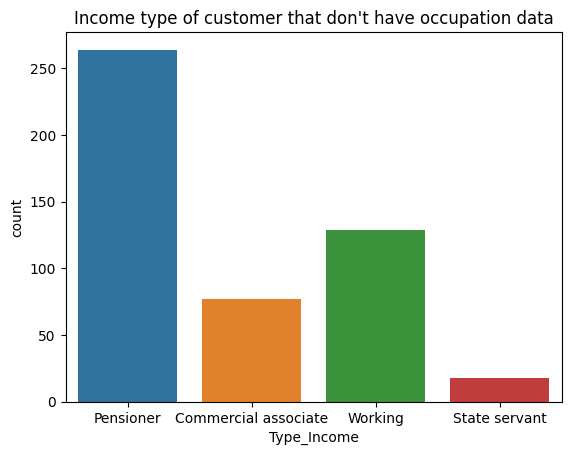

In [11]:
sns.countplot(x=credit_df[credit_df["Type_Occupation"].isna()]["Type_Income"])
plt.title("Income type of customer that don't have occupation data")

**As we can see most of the occupation data missing is a income type of pensioner which make sense, so we label the income type pensioner to occupation type**

In [12]:
credit_df.loc[credit_df["Type_Income"] == "Pensioner", "Type_Occupation"] = "Pensioner"

**About 14 % of occupation information is missing now, So will replace the reset of nan value of occupation info with income type**

In [13]:
# credit_df.loc[credit_df["Type_Income"] == "Commercial associate", "Type_Occupation"] = "Commercial associate"
credit_df.loc[credit_df["Type_Income"] == "Working", "Type_Occupation"] = "Working"
credit_df.loc[credit_df["Type_Income"] == "State servant", "Type_Occupation"] = "State servant"

In [14]:
credit_df.isnull().sum()/credit_df.shape[0]*100

Ind_ID             0.000000
GENDER             0.452196
Car_Owner          0.000000
Propert_Owner      0.000000
CHILDREN           0.000000
Annual_income      1.485788
Type_Income        0.000000
EDUCATION          0.000000
Marital_status     0.000000
Housing_type       0.000000
Birthday_count     1.421189
Employed_days      0.000000
Mobile_phone       0.000000
Work_Phone         0.000000
Phone              0.000000
EMAIL_ID           0.000000
Type_Occupation    4.974160
Family_Members     0.000000
dtype: float64

***nearly 5 % of data is still as null value in occupation information, so decide to drop the column beacuse this impact to analysis and this column does not have useful information ***

In [15]:
credit_df = credit_df.drop(["Type_Occupation"], axis=1)

**Drop all null values of Annual_income, birthday_count, and gender**

In [16]:
credit_df = credit_df.dropna(axis=0)

In [17]:
credit_df.isnull().sum()/credit_df.shape[0]*100

Ind_ID            0.0
GENDER            0.0
Car_Owner         0.0
Propert_Owner     0.0
CHILDREN          0.0
Annual_income     0.0
Type_Income       0.0
EDUCATION         0.0
Marital_status    0.0
Housing_type      0.0
Birthday_count    0.0
Employed_days     0.0
Mobile_phone      0.0
Work_Phone        0.0
Phone             0.0
EMAIL_ID          0.0
Family_Members    0.0
dtype: float64

**Check for mis-spell for categorical columns**

In [18]:
for col in credit_df.columns:
  if credit_df[col].dtypes == np.object:
    print("column : {}, unique_value : {}".format(col, credit_df[col].unique()))

column : GENDER, unique_value : ['M' 'F']
column : Car_Owner, unique_value : ['Y' 'N']
column : Propert_Owner, unique_value : ['Y' 'N']
column : Type_Income, unique_value : ['Pensioner' 'Commercial associate' 'Working' 'State servant']
column : EDUCATION, unique_value : ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
column : Marital_status, unique_value : ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
column : Housing_type, unique_value : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']


<ipython-input-18-7b2575e121ff>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if credit_df[col].dtypes == np.object:


No misspell in the categorical column

In [19]:
#now will merge the data
credit_dataframe = pd.merge(credit_df, credit_labelled_df, on=['Ind_ID'], how='inner')

In [20]:
#keeping one copy for sql
credit_dataframe_for_sql = credit_dataframe.copy()


In [84]:
#saving data for sql task
credit_dataframe_for_sql.to_csv('/content/gdrive/My Drive/Capstone_Project_Credit_Card_approval/mydata.csv', index=False)

**Remove sensitive data**
Here we remove gender out of considering data as it is a sensitive judement.

In [21]:
credit_dataframe = credit_dataframe.drop(['GENDER'], axis=1)

In [22]:
credit_dataframe.head()

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
2,5009752,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
3,5009754,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009894,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1


In [23]:
credit_dataframe['Mobile_phone'].value_counts()

1    1496
Name: Mobile_phone, dtype: int64

mobile phone is 1 for all row which is not beneficial, so will drop it

In [24]:
credit_dataframe = credit_dataframe.drop(['Mobile_phone'], axis=1)

set birthday count and employed days to be in more appropriate format, because it is recorded as date back in time

In [25]:
credit_dataframe['Age'] = (-credit_dataframe['Birthday_count']/365).apply(int)

In [26]:
credit_dataframe['Year_Employed'] = np.ceil((-credit_dataframe['Employed_days']/365))

In [27]:
credit_dataframe.head()

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Age,Year_Employed
0,5008827,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,2,1,51,-1000.0
1,5009744,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,37,2.0
2,5009752,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,37,2.0
3,5009754,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,37,2.0
4,5009894,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,0,0,0,2,1,60,-1000.0


**EDA and Feature engineering**

In [28]:
test_df = credit_dataframe.copy()

removing the birth_cunt column and employee_days

In [29]:
test_df = test_df.drop(['Birthday_count', 'Employed_days'], axis=1)

check for the data suitability for WOE,IV score, if requied we will group it

In [30]:
test_df['Type_Income'].value_counts(normalize=True)*100

Working                 51.403743
Commercial associate    23.596257
Pensioner               17.312834
State servant            7.687166
Name: Type_Income, dtype: float64

In [31]:
test_df['EDUCATION'].value_counts(normalize=True)*100

Secondary / secondary special    66.711230
Higher education                 27.339572
Incomplete higher                 4.411765
Lower secondary                   1.403743
Academic degree                   0.133690
Name: EDUCATION, dtype: float64

We decided to combine incomplete higher, and academic degree into Higher education group, and Lower secondary into Secondary / secondary special. For the later case, we also renamed it to be "Secondary/Lower".

In [32]:
test_df['EDUCATION'] = test_df['EDUCATION'].replace({"Academic degree":"Higher education","Lower secondary":"Secondary/Lower","Secondary / secondary special":"Secondary/Lower"})
test_df['EDUCATION'].value_counts(normalize=True)*100

Secondary/Lower      68.114973
Higher education     27.473262
Incomplete higher     4.411765
Name: EDUCATION, dtype: float64

In [33]:
test_df['Marital_status'].value_counts(normalize=True)*100

Married                 67.580214
Single / not married    14.572193
Civil marriage           6.751337
Separated                6.082888
Widow                    5.013369
Name: Marital_status, dtype: float64

As WOE of Widow/not married are close together, we combined these groups.

In [34]:
test_df['Marital_status'] = test_df['Marital_status'].replace({"Widow":"Separated/Widow","Separated":"Separated/Widow"})
test_df['Marital_status'].value_counts(normalize=True)*100

Married                 67.580214
Single / not married    14.572193
Separated/Widow         11.096257
Civil marriage           6.751337
Name: Marital_status, dtype: float64

Name housing type

In [35]:
test_df['Housing_type'].value_counts(normalize=True)*100

House / apartment      88.970588
With parents            5.280749
Municipal apartment     3.409091
Rented apartment        1.403743
Office apartment        0.601604
Co-op apartment         0.334225
Name: Housing_type, dtype: float64

In [36]:
test_df['Housing_type'] = test_df['Housing_type'].replace({"Co-op apartment":"House / apartment","Office apartment":"House / apartment"})
test_df['Housing_type'].value_counts(normalize=True)*100

House / apartment      89.906417
With parents            5.280749
Municipal apartment     3.409091
Rented apartment        1.403743
Name: Housing_type, dtype: float64

see the number of children and number of family member


In [37]:
test_df.head()

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Age,Year_Employed
0,5008827,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,1,51,-1000.0
1,5009744,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37,2.0
2,5009752,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37,2.0
3,5009754,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37,2.0
4,5009894,N,N,0,180000.0,Pensioner,Secondary/Lower,Married,House / apartment,0,0,0,2,1,60,-1000.0


Text(0.5, 1.0, 'Number of family member')

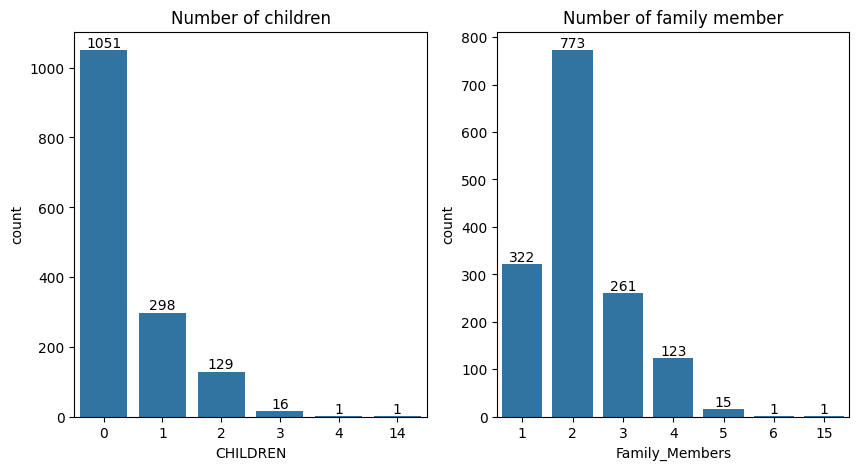

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
cplot = sns.countplot(data=test_df, x="CHILDREN", ax=ax[0],color='tab:Blue')
for container in cplot.containers:
    cplot.bar_label(container)
ax[0].set_title('Number of children')

cplot = sns.countplot(data=test_df, x="Family_Members", ax=ax[1],color='tab:Blue')
for container in cplot.containers:
    cplot.bar_label(container)
ax[1].set_title('Number of family member')

There is clearly outliers on both number of children and family member. The distribution of number of family greater than 1 is exactly the same as the distribution of number of children. This shows that these two features are highly correlated.

Text(0.5, 1.0, 'Plot of number of family member and number of children')

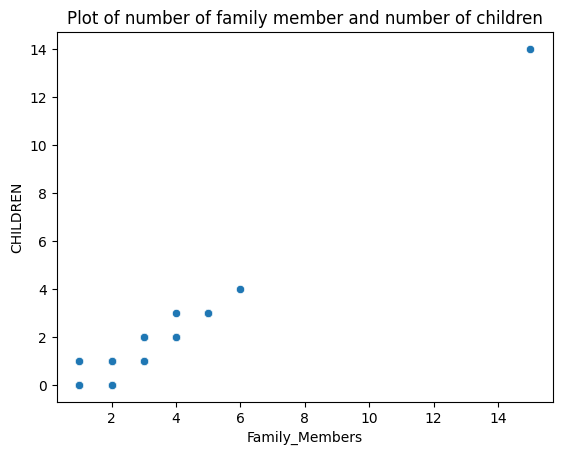

In [39]:
sns.scatterplot(data=test_df, x="Family_Members",y="CHILDREN")
plt.title('Plot of number of family member and number of children')

In [40]:
test_df[["CHILDREN","Family_Members"]].corr()

,CHILDREN,Family_Members
CHILDREN,1.000000,0.891399
Family_Members,0.891399,1.000000


The plot of number of family member and number of children and correlation table confirm the correlation. As the number of family member cover the number of children, we chose to drop the number of children feature.

In [41]:
test_df = test_df.drop(['CHILDREN'], axis=1)

As the logit and CNT_FAM_MEMBERS is not linear (We tested it, but not showing here). We categorize this into categorical data instead. We grouped customer who has 5 or more family together. For 1-4 family member, we group them separately according to the amount of family member.

In [42]:
def get_bin_fam(df):
  binSize = 1
  binOver = 5
  if df < binOver:
    return str(math.ceil(df/binSize))
  else:
    return str(math.ceil(binOver/binSize))

In [43]:
test_df['Fam_group'] = test_df['Family_Members'].apply(get_bin_fam)
test_df['Fam_group'] = test_df['Fam_group'].astype('object')

In [44]:
test_df['Fam_group'].unique()

array(['2', '3', '1', '4', '5'], dtype=object)

In [45]:
test_df = test_df.drop(['Family_Members'], axis=1)

In [46]:
not_approved_credit_card = test_df[test_df['label'] == 1]

<Axes: xlabel='Fam_group', ylabel='count'>

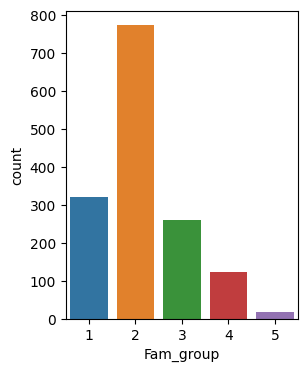

In [47]:
fig, ax = plt.subplots(figsize = (3,4))
RowPlot = "Fam_group"
sns.countplot(data=test_df, x=RowPlot,order=['1','2','3','4','5'])



<Axes: xlabel='Age', ylabel='Count'>

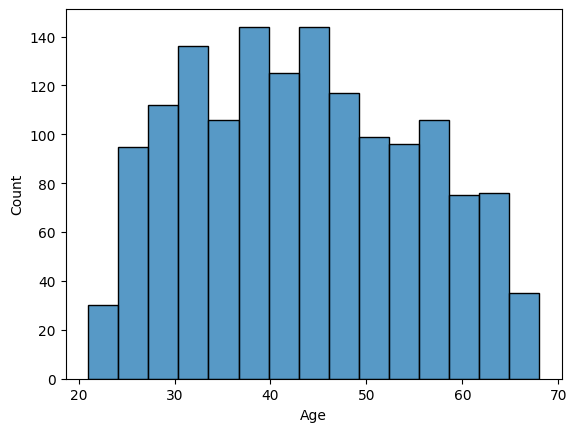

In [48]:
sns.histplot(data=test_df, x="Age",bins=15)

We categorize this into categorical data instead. We grouped customer younger than 25 years old together, and older than 65 years old together. For the customer whose age between 25 and 65 we group them with 5 year-old bin spacing.

In [49]:
def gen_bin_age(df):
    # return group assigned for bin size = binSize
    # assign data > binOver to the last group
    binSize = 5
    binOver = 65
    binMin = 25
    if df <= binMin:
        return str(1)
    elif df <= binOver:
        return str(math.ceil((df-binMin)/binSize))
    else:
        return str(math.ceil((binOver-binMin)/binSize))

In [50]:
test_df["AGE_GROUP"] = test_df["Age"].apply(gen_bin_age)
test_df["AGE_GROUP"] = test_df["AGE_GROUP"].astype('object')

In [51]:
test_df = test_df.drop(['Age'], axis=1)

<Axes: xlabel='AGE_GROUP', ylabel='count'>

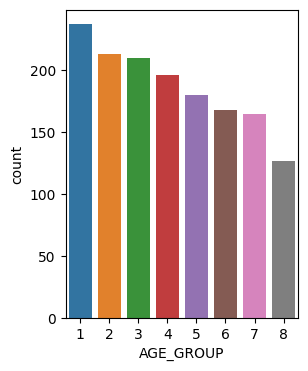

In [52]:
fig, ax = plt.subplots(figsize = (3,4))
RowPlot = "AGE_GROUP"
sns.countplot(data=test_df, x=RowPlot,order=map(str,range(1,9)))

Annual Income

<Axes: xlabel='Annual_income', ylabel='Count'>

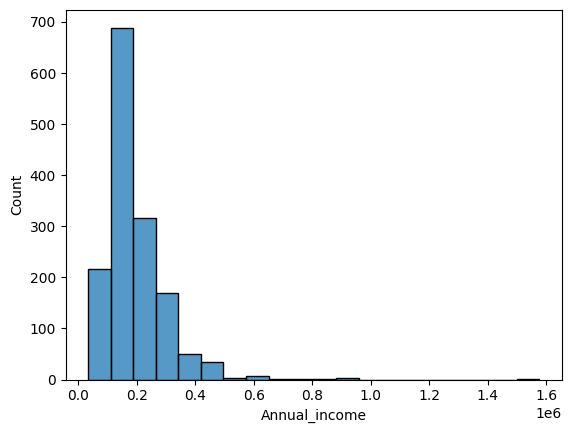

In [53]:
sns.histplot(data=test_df, x="Annual_income",bins=20)

 We categorize this into categorical data instead. We grouped customer having income less than 80000 together, and greater than 320000 together. For the customer haveing income between 40000 and 320000 we group them with 40000 d bin spacing.

In [54]:
def gen_bin_income(df):
    # return group assigned for bin size = binSize
    # assign data > binOver to the last group
    binSize =40000
    binOver = 320000
    binMin = 80000
    if df <= binMin:
        return str(1)
    elif df <= binOver:
        return str(math.ceil((df-binMin)/binSize))
    else:
        return str(math.ceil((binOver-binMin)/binSize))

In [55]:
test_df["AMT_INCOME_TOTAL_GROUP"] = test_df["Annual_income"].apply(gen_bin_income)
test_df["AMT_INCOME_TOTAL_GROUP"] = test_df["AMT_INCOME_TOTAL_GROUP"].astype('object')
test_df= test_df.drop(["Annual_income"],axis=1)

<Axes: xlabel='AMT_INCOME_TOTAL_GROUP', ylabel='count'>

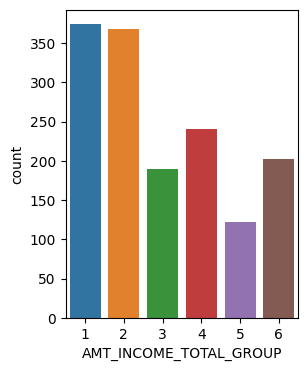

In [56]:
fig, ax = plt.subplots(figsize = (3,4))
RowPlot = "AMT_INCOME_TOTAL_GROUP"
sns.countplot(data=test_df, x=RowPlot,order=['1','2','3','4','5','6'])

**Employed year**

For year employed, we could not continue with continuous data as year employed for pensioner is undefined. Hence we group year employed to be a categorical data.

<Axes: xlabel='count', ylabel='Year_Employed'>

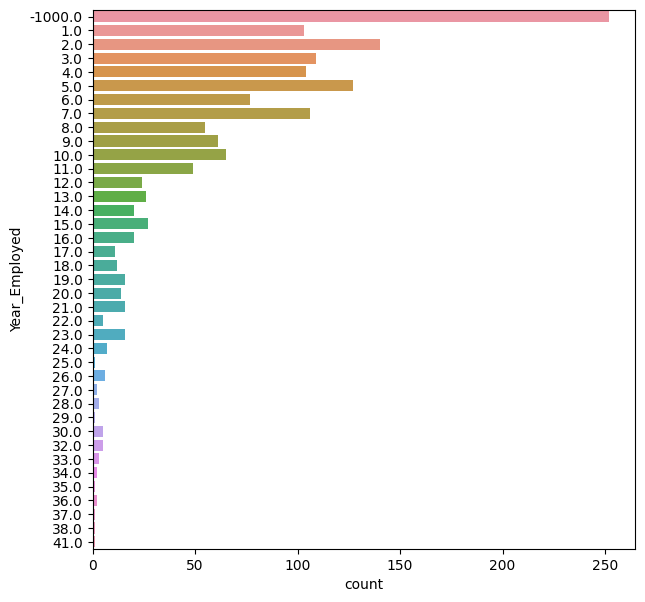

In [57]:
# Show distribution of the data
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(data=test_df,y="Year_Employed")

We categorize this into categorical data instead. For pensioner we separatly grouped them together. We grouped customer have been working greater than 16 years together. For the customers have been working between 2 and 16 we group them with 2 year bin spacing.

In [58]:
def gen_bin_year(df):
    # return group assigned for bin size = binSize
    # assign data > binOver to the last group
    binSize = 2
    binOver = 16
    if df == -1000:
        return str(1)
    elif df <= binOver:
        return str(math.ceil(df/binSize) + 1)
    else:
        return str(math.ceil(binOver/binSize) + 1)

In [59]:
test_df["YEAR_EMPLOYED_GROUP"] = test_df["Year_Employed"].apply(gen_bin_year)

In [60]:
test_df= test_df.drop("Year_Employed",axis=1)
test_df["YEAR_EMPLOYED_GROUP"] = test_df["YEAR_EMPLOYED_GROUP"].astype('object')

In [61]:
# we decided to drop ind_id column, since it is a unique id to identify cutomers
test_df = test_df.drop(['Ind_ID'], axis=1)

In [62]:
test_df.head()

,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,label,Fam_group,AGE_GROUP,AMT_INCOME_TOTAL_GROUP,YEAR_EMPLOYED_GROUP
0,Y,Y,Pensioner,Higher education,Married,House / apartment,0,0,0,1,2,6,3,1
1,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1,2,3,6,2
2,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1,2,3,6,2
3,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1,2,3,6,2
4,N,N,Pensioner,Secondary/Lower,Married,House / apartment,0,0,0,1,2,7,3,1


In [63]:


# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1
    if len(d2) == 1:
        n = force_bin
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

above code reference for WOE, IV using python

https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

medium arcticle which helped me to find out the IV(information value

https://sundarstyles89.medium.com/weight-of-evidence-and-information-value-using-python-6f05072e83eb



In [64]:
final_iv, IV = data_vars(test_df, test_df.label)

<ipython-input-63-6ac951e0df88>:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iv_df = iv_df.append(conv,ignore_index=True)
<ipython-input-63-6ac951e0df88>:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iv_df = iv_df.append(conv,ignore_index=True)
<ipython-input-63-6ac951e0df88>:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iv_df = iv_df.append(conv,ignore_index=True)
<ipython-input-63-6ac951e0df88>:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iv_df = iv_df.append(conv,ignore_index=True)
<ipython-input-63-6ac951e0df88>:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [65]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Car_Owner,N,N,898,101,0.112472,797,0.887528,0.63125,0.596557,0.056527,0.005081
1,Car_Owner,Y,Y,598,59,0.098662,539,0.901338,0.36875,0.403443,-0.089917,0.005081
2,Propert_Owner,N,N,519,58,0.111753,461,0.888247,0.36250,0.345060,0.049307,0.001331
3,Propert_Owner,Y,Y,977,102,0.104401,875,0.895599,0.63750,0.654940,-0.026990,0.001331
4,Type_Income,Commercial associate,Commercial associate,353,46,0.130312,307,0.869688,0.28750,0.229790,0.224055,0.094533
5,Type_Income,Pensioner,Pensioner,259,37,0.142857,222,0.857143,0.23125,0.166168,0.330502,0.094533
6,Type_Income,State servant,State servant,115,5,0.043478,110,0.956522,0.03125,0.082335,-0.968781,0.094533
7,Type_Income,Working,Working,769,72,0.093628,697,0.906372,0.45000,0.521707,-0.147858,0.094533
8,EDUCATION,Higher education,Higher education,411,47,0.114355,364,0.885645,0.29375,0.272455,0.075255,0.007136
9,EDUCATION,Incomplete higher,Incomplete higher,66,5,0.075758,61,0.924242,0.03125,0.045659,-0.379174,0.007136


In [66]:
IV.sort_values('IV')

,VAR_NAME,IV
4,EMAIL_ID,0.000474
9,Propert_Owner,0.001331
8,Phone,0.001800
11,Work_Phone,0.002672
2,Car_Owner,0.005081
3,EDUCATION,0.007136
5,Fam_group,0.017649
1,AMT_INCOME_TOTAL_GROUP,0.021358
0,AGE_GROUP,0.054270
7,Marital_status,0.076140


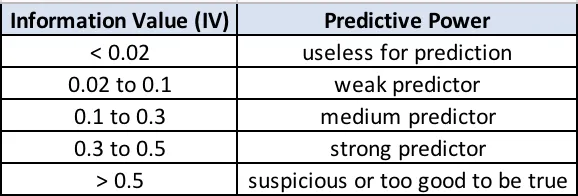

As we can see from IV value that
email_id, propert owner, phone, workphone, carowner, education, fam_group are use less for prediction, so will drop them



In [67]:
test_df_copy = test_df.copy()

In [68]:
test_df_copy = test_df_copy.drop(['EMAIL_ID','Propert_Owner','Phone','Work_Phone','Car_Owner','EDUCATION','Fam_group'], axis=1)

In [69]:
test_df_copy.head()

,Type_Income,Marital_status,Housing_type,label,AGE_GROUP,AMT_INCOME_TOTAL_GROUP,YEAR_EMPLOYED_GROUP
0,Pensioner,Married,House / apartment,1,6,3,1
1,Commercial associate,Married,House / apartment,1,3,6,2
2,Commercial associate,Married,House / apartment,1,3,6,2
3,Commercial associate,Married,House / apartment,1,3,6,2
4,Pensioner,Married,House / apartment,1,7,3,1


Rest of the columns are now week predictor

**Modelling**

In [70]:
test_df_copy["label"].value_counts(normalize=True)*100

0    89.304813
1    10.695187
Name: label, dtype: float64

split data into train and test

In [71]:

x_log_reg = test_df_copy.drop(['label'], axis=1)
y_log_reg = test_df_copy['label']

x_train, x_test, y_train, y_test = train_test_split(x_log_reg, y_log_reg, test_size=0.25, stratify=y_log_reg, random_state=42)

In [72]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1357 to 644
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Type_Income             374 non-null    object
 1   Marital_status          374 non-null    object
 2   Housing_type            374 non-null    object
 3   AGE_GROUP               374 non-null    object
 4   AMT_INCOME_TOTAL_GROUP  374 non-null    object
 5   YEAR_EMPLOYED_GROUP     374 non-null    object
dtypes: object(6)
memory usage: 20.5+ KB


Handle imbalance data by using SMOTE

In [73]:
x_train_balance,y_train_balance = SMOTEN(random_state=10).fit_resample(x_train, y_train)

x_LogReg_train_encoded = pd.get_dummies(x_train_balance)
x_LogReg_test_encoded = pd.get_dummies(x_test)

In [ ]:
x_LogReg_train_encoded.info()

# Binary logistic regression

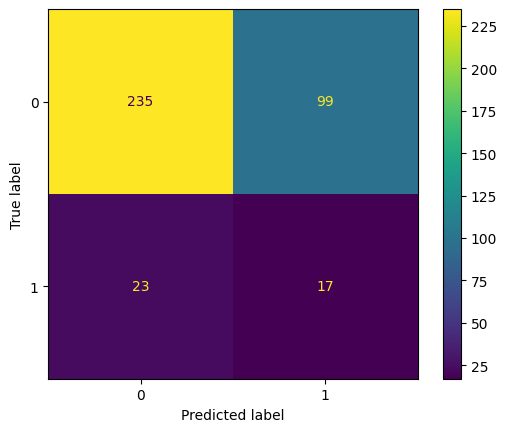

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       334
           1       0.15      0.42      0.22        40

    accuracy                           0.67       374
   macro avg       0.53      0.56      0.51       374
weighted avg       0.83      0.67      0.73       374



In [77]:
log_clf = LogisticRegression(random_state=42, max_iter=2000).fit(x_LogReg_train_encoded, y_train_balance)
y_predict= log_clf.predict(x_LogReg_test_encoded)
log_cm = confusion_matrix(y_test, y_predict, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()
print(classification_report(y_test,y_predict))
y_pred_log = y_predict.copy()

# Random forest

In [78]:
cv_params = {'n_estimators' : [50,100,200],
              'max_depth' : [10,20,50],
              'min_samples_leaf':[1,5,10]}
rf = RandomForestClassifier(random_state=0)
rf_val = GridSearchCV(rf, cv_params, refit='f1')
rf_val.fit(x_LogReg_train_encoded, y_train_balance)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1')

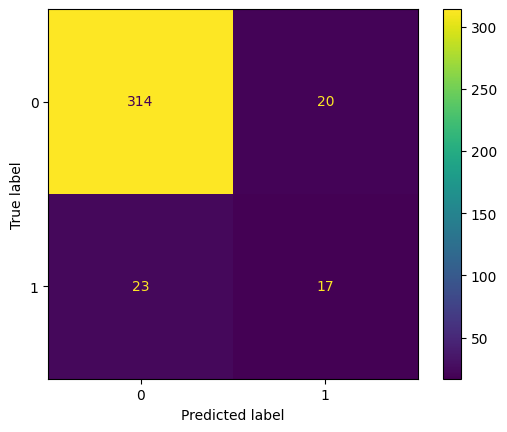

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       334
           1       0.46      0.42      0.44        40

    accuracy                           0.89       374
   macro avg       0.70      0.68      0.69       374
weighted avg       0.88      0.89      0.88       374



In [79]:
y_predict = rf_val.predict(x_LogReg_test_encoded)
log_cm = confusion_matrix(y_test, y_predict, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()
print(classification_report(y_test,y_predict))
y_pred_rf = y_predict.copy()

# XG Boost

In [80]:
cv_params = {'max_depth': [4, 6, 8],
              'min_child_weight': [1, 3, 5],
              'learning_rate': [0.1, 0.3, 0.5],
              'n_estimators': [50,100,200],
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [81]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [82]:
xgb_cv = xgb_cv.fit(x_LogReg_train_encoded, y_train_balance)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [4, 6, 8], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring={'recall', 'accuracy', 'precision', 'f1'})

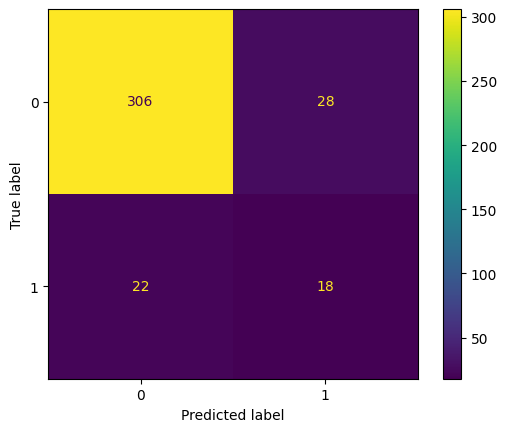

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       334
           1       0.39      0.45      0.42        40

    accuracy                           0.87       374
   macro avg       0.66      0.68      0.67       374
weighted avg       0.87      0.87      0.87       374



In [83]:
y_predict = xgb_cv.predict(x_LogReg_test_encoded)
log_cm = confusion_matrix(y_test, y_predict, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()
print(classification_report(y_test,y_predict))
y_pred_xg = y_predict.copy()

The models developed failed to predict approval customers. Though the process can be finely tuned, e.g. choices of grouping data, and feature engineering (which we already did some experiment (not shown here)), the performance of the model is not increase significantlty. The assumption we made are 1) The lack of highly relavant data, e.g. debt, mortgage, and expense. 2) There is small example of bad customer (the data is highly imbalance).